# Homework 2

The quadratic equation takes the general form:

$ax^2 + bx + c = 0$

The analytical solution to the quadratic equations can take two forms:

1) $x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

2) $x_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4ac}}$


This assignment is as follows:

a) Write a program that calculates all four solutions for arbitrary values of a, b, and c.

b) Investigate how errors in your computed answers become large as the subtractive cancelation increases and relate this to the known machine precision ($\textit{Hint}$: A good test utilizes a=1, b-1, $c=10^{-n}$, n = 1,2,3,...)

c) Extend your program so that it indicates the most precise solutions.

In [3]:
"""
First, define functions for each solution form to the quadratic equation.
I call these quad1 and quad2.
"""
import numpy as np

def quad1(a, b, c):
    x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return [x1, x2]

def quad2(a, b, c):
    x1 = (-2*c)/(b + np.sqrt(b**2 - 4*a*c))
    x2 = (-2*c)/(b - np.sqrt(b**2 - 4*a*c))
    return [x1, x2]

In [2]:
"""
Test with "good" parameters to ensure that my two functions work properly.
"""

a = 1
b = -4
c = 4

print(quad1(a,b,c))
print(quad2(a,b,c))

#I am getting the output that I expect.

[2.0, 2.0]
[2.0, 2.0]


In [3]:
"""
Next, I will do a qualitative look at how my solutions change as I gradually decrease
the value of parameter c.
"""
a = 1
b = 1

for i in range(1,18):
    c = 10**(-i)
    #d = 0.96
    print("quad1, i = ", i, quad1(a,b,c))
    print("quad2, i = ", i, quad2(a,b,c))

quad1, i =  1 [-0.1127016653792583, -0.8872983346207417]
quad2, i =  1 [-0.11270166537925831, -0.8872983346207418]
quad1, i =  2 [-0.010102051443364402, -0.9898979485566356]
quad2, i =  2 [-0.01010205144336438, -0.9898979485566336]
quad1, i =  3 [-0.0010010020050140178, -0.998998997994986]
quad2, i =  3 [-0.001001002005014042, -0.9989989979950102]
quad1, i =  4 [-0.00010001000200049459, -0.9998999899979994]
quad2, i =  4 [-0.00010001000200050015, -0.9998999899980551]
quad1, i =  5 [-1.0000100002016676e-05, -0.9999899998999979]
quad2, i =  5 [-1.000010000200005e-05, -0.9999899998983355]
quad1, i =  6 [-1.000001000006634e-06, -0.999998999999]
quad2, i =  6 [-1.000001000002e-06, -0.999998999994366]
quad1, i =  7 [-1.0000000999488279e-07, -0.99999989999999]
quad2, i =  7 [-1.00000010000002e-07, -0.9999999000511821]
quad1, i =  8 [-1.0000000105758744e-08, -0.9999999899999998]
quad2, i =  8 [-1.0000000100000004e-08, -0.9999999894241257]
quad1, i =  9 [-1.0000000272292198e-09, -0.999999998999

C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


From above output, it looks like we reach machine precision (10$^{-16}$) when we let c equal the machine precision. To get an idea of the error associated with the subraction operation in the determinant, I look at a few of the above values and calculate the relative error between solutions generated by **quad1** and **quad2**, and the analytical solution for a chosen value of c.

Since in these cases the determinant results in a decimal and I am taking the square root of a decimal number, I can only get an approximation for the analytical solution: I approximate the analytical solution for a given value of c by the binomial approximation (first order Taylor expansion).

$$(1+x)^{\alpha} \approx 1 + \alpha x$$

Then, I can compute the relative error between the analytical solution $x_a$ with the computed solution $x_c$ from the following formula:



$$\epsilon = \left|\frac{x_{a}-x'_{c}}{x_{a}}\right|$$

I do this on the values of i from i=1 to i=15 for $c=10^{-i}$.


For different values of c, the determinant $\sqrt{b^2 - 4ac}$ becomes:

1) $(1 - 4*10^{-1})^{1/2} \approx (1 - 0.4)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{10} \approx 1 - \frac{1}{5} \approx 0.8$

2) $(1 - 4*10^{-2})^{1/2} \approx (1 - 0.04)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{100} \approx 1 - \frac{1}{50} \approx 0.98$

3) $(1 - 4*10^{-3})^{1/2} \approx (1 - 0.004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{1000} \approx 1 - \frac{1}{500} \approx 0.998$

4) $(1 - 4*10^{-4})^{1/2} \approx (1 - 0.0004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{10000} \approx 1 - \frac{1}{5000} \approx 0.9998$

5) $(1 - 4*10^{-5})^{1/2} \approx (1 - 0.00004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{100000} \approx 1 - \frac{1}{50000} \approx 0.99998$

6) $(1 - 4*10^{-6})^{1/2} \approx (1 - 0.000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{1000000} \approx 1 - \frac{1}{500000} \approx 0.999998$

7) $(1 - 4*10^{-7})^{1/2} \approx (1 - 0.0000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{10000000} \approx 1 - \frac{1}{5000000} \approx 0.9999998$

8) $(1 - 4*10^{-8})^{1/2} \approx (1 - 0.00000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{100000000} \approx 1 - \frac{1}{50000000} \approx 0.99999998$

9) $(1 - 4*10^{-9})^{1/2} \approx (1 - 0.000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{1000000000} \approx 1 - \frac{1}{500000000} \approx 0.999999998$

10) $(1 - 4*10^{-10})^{1/2} \approx (1 - 0.0000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{10000000000} \approx 1 - \frac{1}{5000000000} \approx 0.9999999998$

11) $(1 - 4*10^{-11})^{1/2} \approx (1 - 0.00000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{100000000000} \approx 1 - \frac{1}{50000000000} \approx 0.99999999998$

12) $(1 - 4*10^{-12})^{1/2} \approx (1 - 0.000000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{1000000000000} \approx 1 - \frac{1}{500000000000} \approx 0.999999999998$

13) $(1 - 4*10^{-13})^{1/2} \approx (1 - 0.0000000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{10000000000000} \approx 1 - \frac{1}{5000000000000} \approx 0.9999999999998$

14) $(1 - 4*10^{-14})^{1/2} \approx (1 - 0.00000000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{100000000000000} \approx 1 - \frac{1}{50000000000000} \approx 0.99999999999998$

15) $(1 - 4*10^{-15})^{1/2} \approx (1 - 0.000000000000004)^{1/2} \approx 1 - \frac{1}{2}\frac{4}{1000000000000000} \approx 1 - \frac{1}{500000000000000} \approx 0.999999999999998$

Plugging these determinant values into **quad2** equation, we get the following analytical solutions:

1) $[x_1, x_2] = [-0.1, -0.9]$

2) $[x_1, x_2] = [-0.01, -0.99]$

3) $[x_1, x_2] = [-0.001, -0.999]$

4) $[x_1, x_2] = [-0.0001, -0.9999]$

5) $[x_1, x_2] = [-0.00001, -0.99999]$

6) $[x_1, x_2] = [-0.000001, -0.999999]$

7) $[x_1, x_2] = [-0.0000001, -0.9999999]$

8) $[x_1, x_2] = [-0.00000001, -0.99999999]$

9) $[x_1, x_2] = [-0.000000001, -0.999999999]$

10) $[x_1, x_2] = [-0.0000000001, -0.9999999999]$

11) $[x_1, x_2] = [-0.00000000001, -0.99999999999]$

12) $[x_1, x_2] = [-0.000000000001, -0.999999999999]$

13) $[x_1, x_2] = [-0.0000000000001, -0.9999999999999]$

14) $[x_1, x_2] = [-0.0000000000001, -0.99999999999999]$

15) $[x_1, x_2] = [-0.00000000000001, -0.999999999999999]$

In [5]:
"""
Calculating relative error between analytical solution and solutions computed by quad2 formula.
"""

a = 1
b = 1
x_a = np.array([[-0.1, -0.9], [-0.01, -0.99], [-0.001, -0.999], [-0.0001, -0.9999],
                [-0.00001, -0.99999], [-0.000001, -0.999999], [-0.0000001, -0.9999999],
                [-0.00000001, -0.99999999], [-0.000000001, -0.999999999], 
                [-0.0000000001, -0.9999999999], [-0.00000000001, -0.99999999999], 
                [-0.000000000001, -0.999999999999], [-0.0000000000001, -0.9999999999999],
                [-0.0000000000001, -0.99999999999999],
                [-0.00000000000001, -0.999999999999999]])

x_c = np.empty_like(x_a) # nx2 array to hold computed solutions for [x1,x2] generated by quad1 function call.

rel_err_x1 = []
rel_err_x2 = []
c_range = range(1,16,1)
c_values = []
count = 0

for i in c_range:
    c = 10**(-i)
    c_values.append(c)
    x_c[count] = quad2(a,b,c)
    print("Relative error of x1 for i = ", i, ": ", np.abs((x_a[count][0]-x_c[count][0])/x_a[count][0]))
    print("Relative error of x2 for i = ", i, ": ", np.abs((x_a[count][1]-x_c[count][1])/x_a[count][1]))
    rel_err_x1.append(np.abs((x_a[count][0]-x_c[count][0])/x_a[count][0]))
    rel_err_x2.append(np.abs((x_a[count][1]-x_c[count][1])/x_a[count][1]))
    count += 1
    
print("x_a: ", x_a)
print("x_c: ", x_c)
print("c_values: ", c_values)

Relative error of x1 for i =  1 :  0.12701665379258306
Relative error of x2 for i =  1 :  0.01411296153250912
Relative error of x1 for i =  2 :  0.01020514433643805
Relative error of x2 for i =  2 :  0.00010308226602665763
Relative error of x1 for i =  3 :  0.0010020050140420803
Relative error of x2 for i =  3 :  1.00300799775631e-06
Relative error of x1 for i =  4 :  0.00010002000500142845
Relative error of x2 for i =  4 :  1.0002945233465477e-08
Relative error of x1 for i =  5 :  1.0000200004998971e-05
Relative error of x2 for i =  5 :  1.016655823106807e-10
Relative error of x1 for i =  6 :  1.0000020000841504e-06
Relative error of x2 for i =  6 :  5.6339433947062146e-12
Relative error of x1 for i =  7 :  1.0000002008273518e-07
Relative error of x2 for i =  7 :  5.118206370954332e-11
Relative error of x1 for i =  8 :  1.0000000334059958e-08
Relative error of x2 for i =  8 :  5.758742429440457e-10
Relative error of x1 for i =  9 :  1.0000001492112815e-09
Relative error of x2 for i = 

Below I graph the relative error as a function of the value of the c parameter used in each iteration.

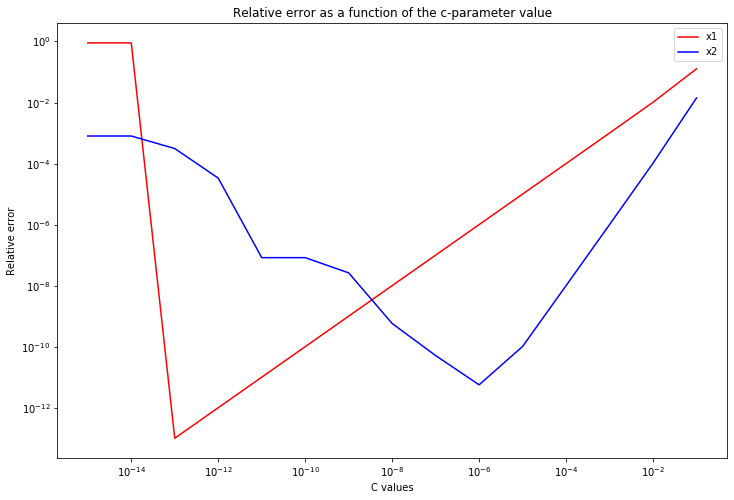

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.plot(c_values, rel_err_x1, 'r-', label='x1')
plt.plot(c_values, rel_err_x2, 'b-', label='x2')
plt.xlabel("C values")
plt.ylabel("Relative error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error as a function of the c-parameter value')
plt.legend()
plt.show()


From the plot, we can see that the relative error for values of $x_1$ and $x_2$ have a minimum value for particular values of the parameter c. We can relate this phenomenon to a trade off between round-off error (machine precision) and truncation error (from approximation). Thus, in these calculations for solutions to the quadratic formula, we want values for c that are neither too large nor too small.


Below I extend my program so that it indicates the "most precise" solution. To do this, I create a relative error tolerance of $10^{-5}$.


In [24]:
"""
Indicating the most precise solutions.

"""

a = 1
b = 1
x_a = np.array([[-0.1, -0.9], [-0.01, -0.99], [-0.001, -0.999], [-0.0001, -0.9999],
                [-0.00001, -0.99999], [-0.000001, -0.999999], [-0.0000001, -0.9999999],
                [-0.00000001, -0.99999999], [-0.000000001, -0.999999999], 
                [-0.0000000001, -0.9999999999], [-0.00000000001, -0.99999999999], 
                [-0.000000000001, -0.999999999999], [-0.0000000000001, -0.9999999999999],
                [-0.0000000000001, -0.99999999999999],
                [-0.00000000000001, -0.999999999999999]])

x_c = np.empty_like(x_a) # nx2 array to hold computed solutions for [x1,x2] generated by quad1 function call.

rel_err_x1 = []
rel_err_x2 = []
c_range = range(1,16,1)
c_values = []
count = 0


for i in c_range:
    c = 10**(-i)
    c_values.append(c)
    x_c[count] = quad2(a,b,c)
    #print("Relative error of x1 for i = ", i, ": ", np.abs((x_a[count][0]-x_c[count][0])/x_a[count][0]))
    #print("Relative error of x2 for i = ", i, ": ", np.abs((x_a[count][1]-x_c[count][1])/x_a[count][1]))
    rel_err_x1.append(np.abs((x_a[count][0]-x_c[count][0])/x_a[count][0]))
    rel_err_x2.append(np.abs((x_a[count][1]-x_c[count][1])/x_a[count][1]))
    count += 1

precise_values = np.array([np.argmin(rel_err_x1)+1, np.argmin(rel_err_x2)+1])

print("Most precise solutions obtained for [x1,x2] when i = ", precise_values)
    
#print("x_a: ", x_a)
#print("x_c: ", x_c)
#print("c_values: ", c_values)

Most precise solutions obtained for [x1,x2] when i =  [12  5]
